# Train regression

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# === Step 1: Load Data ===
features_df = pd.read_csv("audio_features.csv")
labels_df = pd.read_csv("dataset_labels.csv")

merged_df = pd.merge(features_df, labels_df, on="file")

In [4]:
# === Step 2: Prepare Input (X) and Output (y) ===
X = merged_df.drop(columns=["file", "EQ_80", "EQ_240", "EQ_2500", "EQ_4000", "EQ_10000"])
y = merged_df[["EQ_80", "EQ_240", "EQ_2500", "EQ_4000", "EQ_10000"]]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# === Step 3: Train/Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [6]:
# === Step 4: Train Model ===
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
# === Step 5: Predict & Evaluate ===
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 0.0192


In [13]:
# === Step 6: Compare Predictions ===
pred_df = pd.DataFrame(y_pred, columns=["EQ_80_pred", "EQ_240_pred", "EQ_2500_pred", "EQ_4000_pred", "EQ_10000_pred"])
pred_df[["EQ_80_true", "EQ_240_true", "EQ_2500_true", "EQ_4000_true", "EQ_10000_true"]] = y_test.reset_index(drop=True)
print(pred_df.head())

   EQ_80_pred  EQ_240_pred  EQ_2500_pred  EQ_4000_pred  EQ_10000_pred  \
0   -0.012519    -2.992010      0.041092     -0.134495      -0.040910   
1   -0.024472     0.002987     -1.996560     -0.041196      -0.071964   
2   -0.029784     0.004033      8.052386     -0.068106      -0.066302   
3   -0.002393     0.001115      0.049439     -0.125643       1.017038   
4   -0.002493    -0.000170      0.035585     10.926612       0.035963   

   EQ_80_true  EQ_240_true  EQ_2500_true  EQ_4000_true  EQ_10000_true  
0         0.0         -3.0           0.0           0.0            0.0  
1         0.0          0.0          -2.0           0.0            0.0  
2         0.0          0.0           8.0           0.0            0.0  
3         0.0          0.0           0.0           0.0            1.0  
4         0.0          0.0           0.0          11.0            0.0  


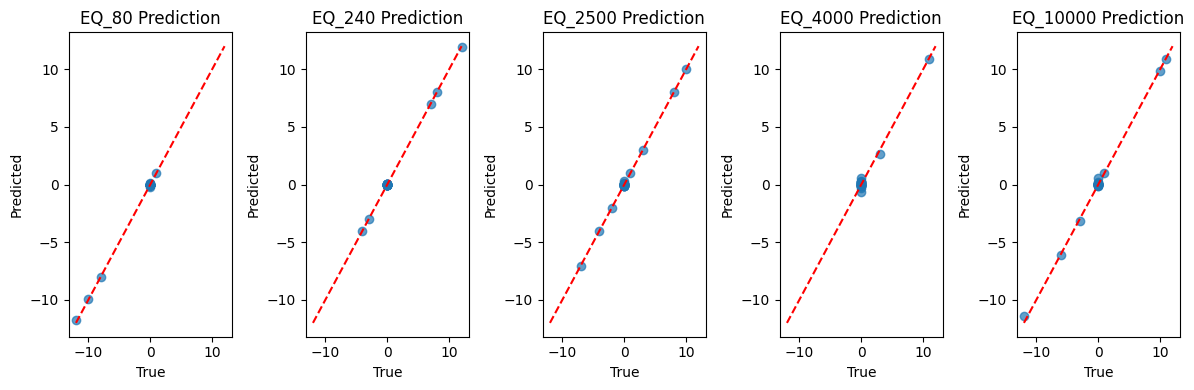

In [14]:
# === Step 7: Plot ===
plt.figure(figsize=(12, 4))
for i, label in enumerate(["EQ_80", "EQ_240", "EQ_2500", "EQ_4000", "EQ_10000"]):
    plt.subplot(1, 5, i+1)
    plt.scatter(pred_df[f"{label}_true"], pred_df[f"{label}_pred"], alpha=0.7)
    plt.plot([-12, 12], [-12, 12], color='r', linestyle='--')
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.title(f"{label} Prediction")
plt.tight_layout()
plt.show()


# Train random forest regressor

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [16]:
# === Step 1: Load Data ===
features_df = pd.read_csv("audio_features.csv")
labels_df = pd.read_csv("dataset_labels.csv")

# Merge on filename
merged_df = pd.merge(features_df, labels_df, on="file")

In [17]:
# === Step 2: Prepare Input (X) and Output (y) ===
X = merged_df.drop(columns=["file", "EQ_80", "EQ_240", "EQ_2500", "EQ_4000", "EQ_10000"])
y = merged_df[["EQ_80", "EQ_240", "EQ_2500", "EQ_4000", "EQ_10000"]]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# === Step 3: Train/Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [19]:
# === Step 4: Train Random Forest Model ===
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [21]:
# === Step 5: Predict & Evaluate ===
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Random Forest - Mean Squared Error: {mse:.4f}")


Random Forest - Mean Squared Error: 0.3670


In [22]:
# === Step 6: Compare Predictions ===
pred_df = pd.DataFrame(y_pred, columns=["EQ_80_pred", "EQ_240_pred", "EQ_2500_pred", "EQ_4000_pred", "EQ_10000_pred"])
pred_df[["EQ_80_true", "EQ_240_true", "EQ_2500_true", "EQ_4000_true", "EQ_10000_true"]] = y_test.reset_index(drop=True)
print(pred_df.head())

   EQ_80_pred  EQ_240_pred  EQ_2500_pred  EQ_4000_pred  EQ_10000_pred  \
0        0.04        -1.28         -0.31         -0.29           0.12   
1        0.06         0.06         -1.58         -0.46           0.23   
2        0.19         0.00          7.46          0.00           0.00   
3       -0.25        -0.20         -0.20          0.04           0.55   
4        0.06         0.22          0.02          9.17           0.12   

   EQ_80_true  EQ_240_true  EQ_2500_true  EQ_4000_true  EQ_10000_true  
0         0.0         -3.0           0.0           0.0            0.0  
1         0.0          0.0          -2.0           0.0            0.0  
2         0.0          0.0           8.0           0.0            0.0  
3         0.0          0.0           0.0           0.0            1.0  
4         0.0          0.0           0.0          11.0            0.0  


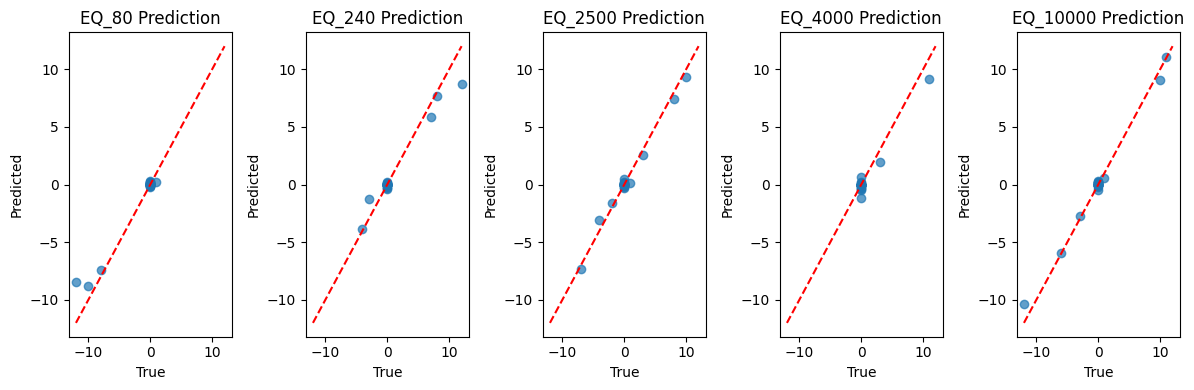

In [23]:
# === Step 7: Plot ===
plt.figure(figsize=(12, 4))
for i, label in enumerate(["EQ_80", "EQ_240", "EQ_2500", "EQ_4000", "EQ_10000"]):
    plt.subplot(1, 5, i+1)
    plt.scatter(pred_df[f"{label}_true"], pred_df[f"{label}_pred"], alpha=0.7)
    plt.plot([-12, 12], [-12, 12], color='r', linestyle='--')
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.title(f"{label} Prediction")
plt.tight_layout()
plt.show()
